<h1>Facebook Network</h1>

In [4]:
library('igraph')

<h1>1.1 Structural properties of the facebook network</h1>

<h2>Q1</h2>

[1] TRUE

Number of edges:  88234
Number of vertices:  4039


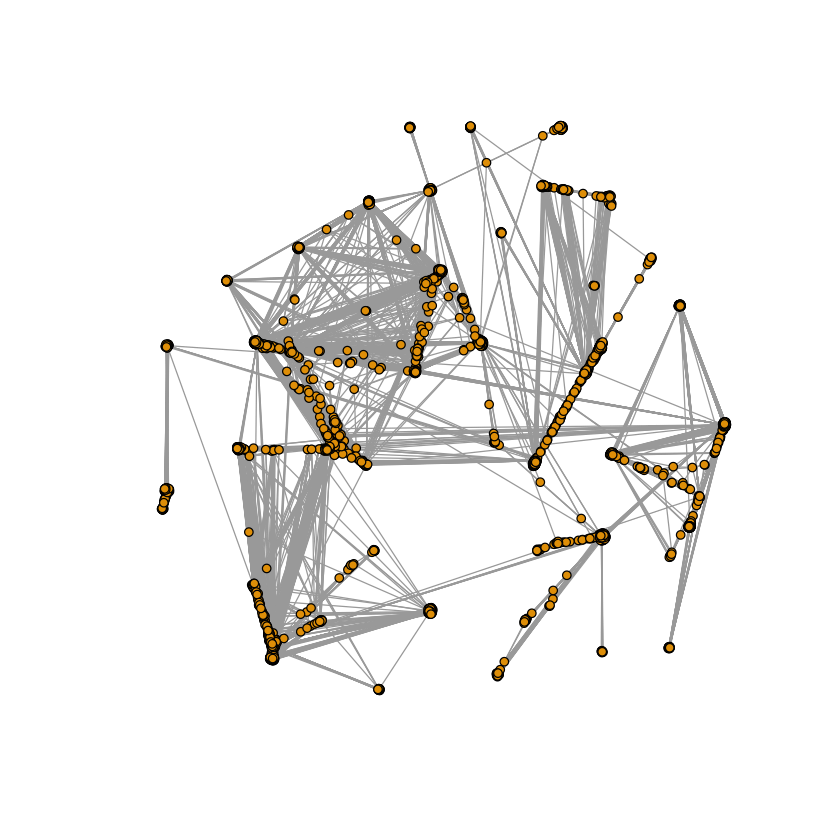

In [5]:
facebook_graph <- read.graph('facebook_combined.txt', format='edgelist', directed=FALSE)
is.connected(facebook_graph)
writeLines(paste("Number of edges: ", ecount(facebook_graph)))
writeLines(paste("Number of vertices: ", vcount(facebook_graph)))
plot(facebook_graph, vertex.label=NA, vertex.size=3)

<h2>Q2</h2>

In [4]:
writeLines(paste("Diameter of network: ", diameter(facebook_graph)))

Diameter of network:  8


<h2>Q3</h2>

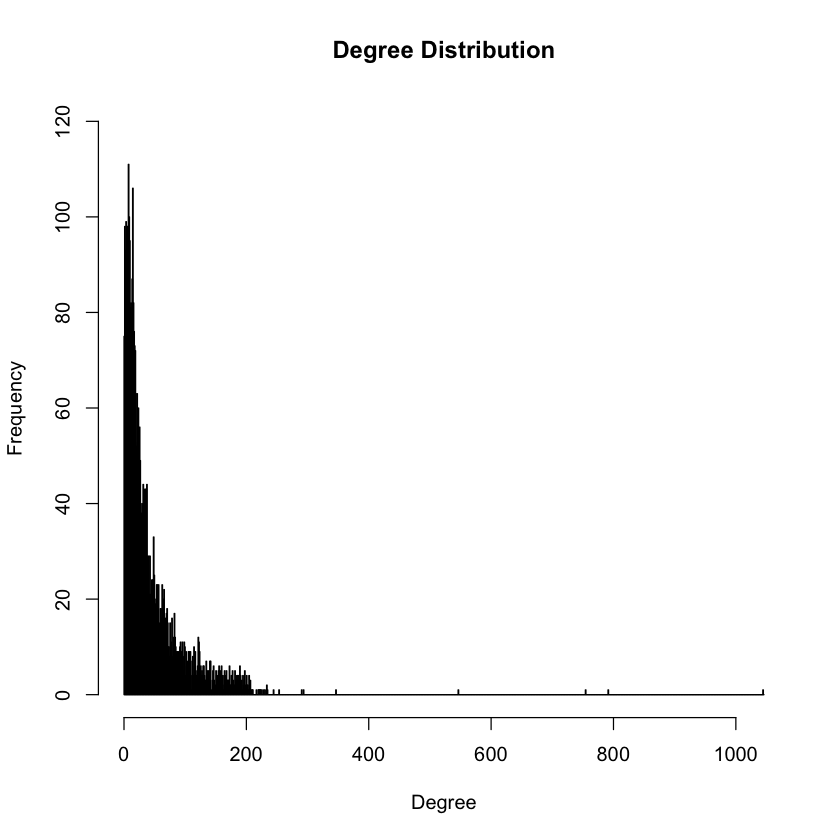

In [5]:
degree_distribution <- degree(facebook_graph)
histogram = hist(degree_distribution, breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 1), ylim=c(0, 120), xlab="Degree",ylab="Frequency", main="Degree Distribution")

In [6]:
writeLines(paste("Average degree: ", mean(degree_distribution)))

Average degree:  43.6910126268878


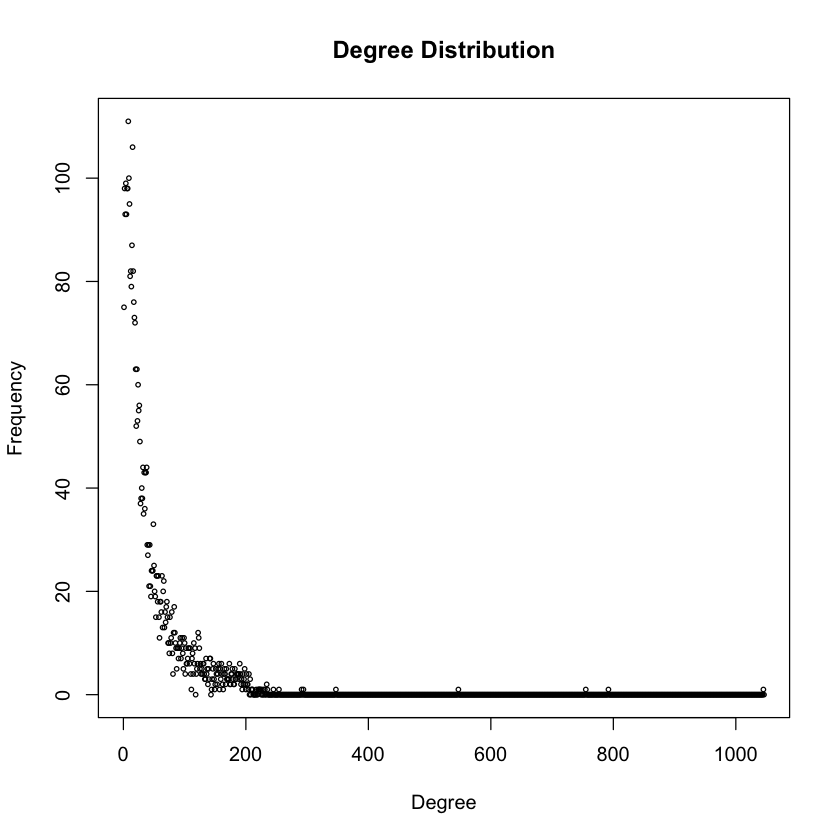

In [12]:
plot(histogram$counts, xlab="Degree",ylab="Frequency", main="Degree Distribution", cex=0.5)

<h2>Q4</h2>

Slope: -5.03100753683462e-06


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“819 y values <= 0 omitted from logarithmic plot”

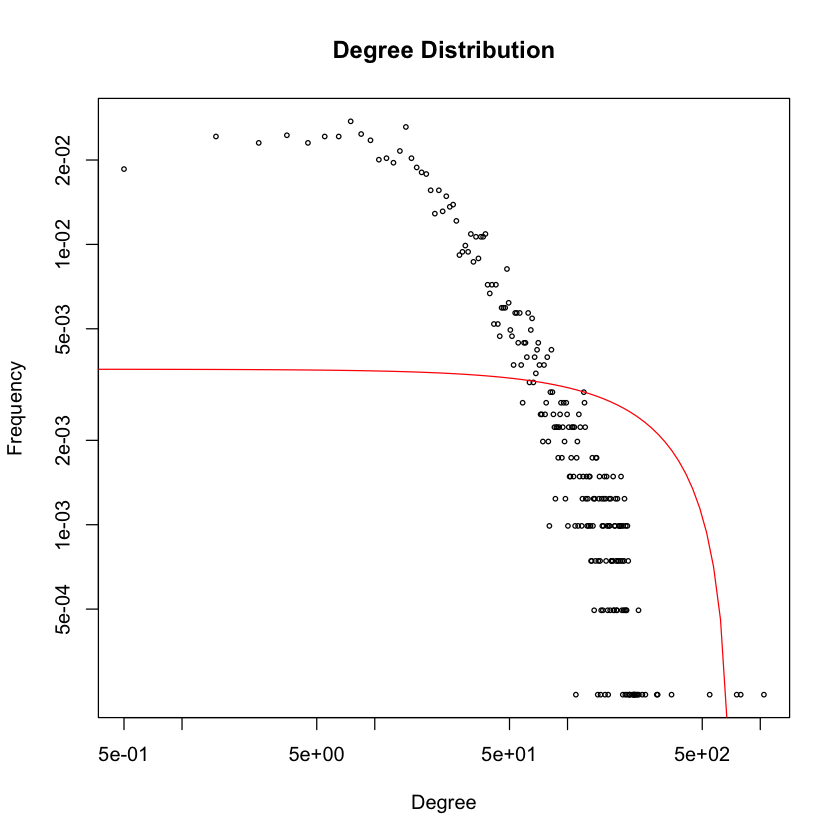

In [24]:
x <- histogram$mids
y <- histogram$density
line <- lm(y~x)
fit <-lm(y ~ x)
slope <- coef(fit)[2]
writeLines(paste("Slope:", slope))
plot(x, y, log="xy", xlab="Degree",ylab="Frequency", main="Degree Distribution", cex=0.5)
abline(line, col="red", untf=TRUE)

<h1>1.2 Personalized network</h1>

<h2>Q5</h2>

Number of edges:  2866
Number of vertices:  348


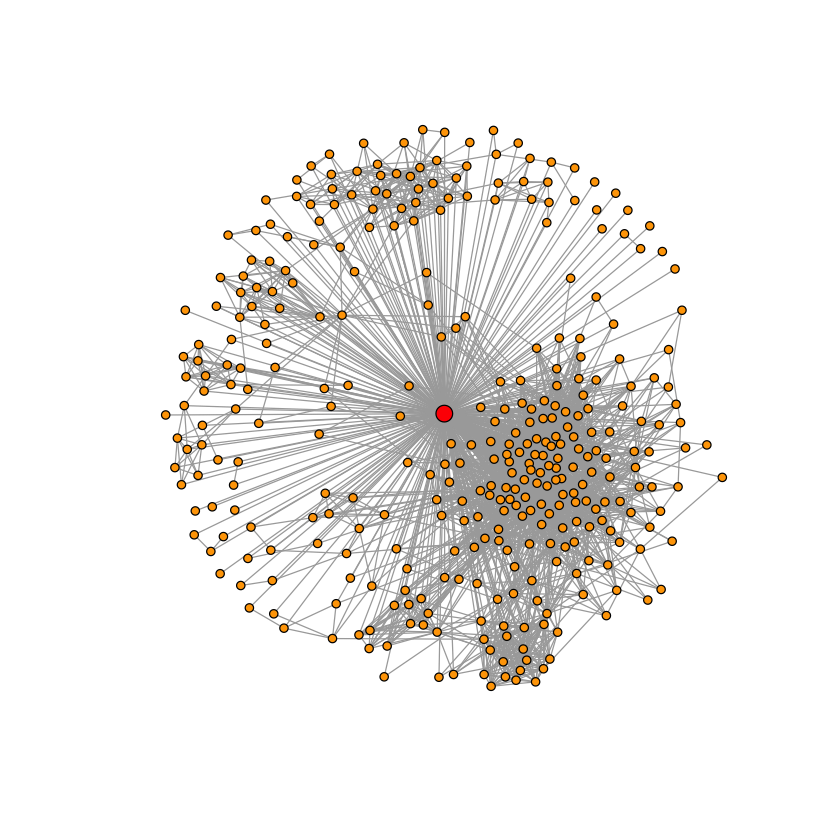

In [56]:
personal_network = induced_subgraph(facebook_graph, vids=c(1, neighbors(facebook_graph, 1)))
writeLines(paste("Number of edges: ", ecount(personal_network)))
writeLines(paste("Number of vertices: ", vcount(personal_network)))
V(personal_network)$color <- "orange"
V(personal_network)[1]$color <- "red"
V(personal_network)$size <- 3
V(personal_network)[1]$size <- 6
plot(personal_network, vertex.label=NA)

<h2>Q6</h2>

In [57]:
writeLines(paste("Diameter of personal network: ", diameter(personal_network)))

Diameter of personal network:  2


<h1>1.3 Core node’s personalized network</h1>

<h2>Q8</h2>

In [69]:
core_nodes = 0
deg = 0
for (n in 1:vcount(facebook_graph)) {
    neigh = neighbors(facebook_graph, n)
    if (length(neigh) > 200) {
        core_nodes = core_nodes + 1
        deg = deg + degree(facebook_graph, v=n)
    }
}
writeLines(paste("Number of core nodes: ", core_nodes))
writeLines(paste("Average degree: ", deg/core_nodes))

Number of core nodes:  40
Average degree:  279.375


<h2>Q9</h2>

In [6]:
community_structure = function(node_id, algorithm, remove_core=FALSE) {
    if (remove_core==TRUE) {
        personal_network = induced_subgraph(facebook_graph, vids=c(neighbors(facebook_graph, node_id)))
    } else {
        personal_network = induced_subgraph(facebook_graph, vids=c(node_id, neighbors(facebook_graph, node_id)))
    }
    V(personal_network)$color <- "orange"
    V(personal_network)[node_id]$color <- "red"
    V(personal_network)$size <- 3
    V(personal_network)[node_id]$size <- 6
    
    writeLines(paste(c("Node ID: ", node_id, " Algorithm: ", algorithm), collapse=""))
    writeLines(paste("Diameter of personal network: ", diameter(personal_network)))
    
    if (algorithm == 'fast_greedy') {
        writeLines(paste("Fast-greedy"))
        community = cluster_fast_greedy(personal_network)
    } else if (algorithm == 'edge_betweenness') {
        writeLines(paste("Edge-betweenness"))
        community = cluster_edge_betweenness(personal_network)
    } else {
        writeLines(paste("Infomap"))
        community = cluster_infomap(personal_network)
    }
    
    writeLines(paste("Modularity of community: ", modularity(community)))
    writeLines(paste("Number of communities: ", length(community)))
    plot(community, personal_network, vertex.label=NA, layout = layout.fruchterman.reingold)
    title(main=paste(c("Node ID: ", node_id, " Algorithm: ", algorithm), collapse=""), cex.main=0.9)
    writeLines(paste(rep("#", 100), collapse=""))
}

Node ID: 1 Algorithm: fast_greedy
Diameter of personal network:  2
Fast-greedy
Modularity of community:  0.413101372834235
Number of communities:  8
####################################################################################################
Node ID: 1 Algorithm: edge_betweenness
Diameter of personal network:  2
Edge-betweenness
Modularity of community:  0.353302172546335
Number of communities:  41


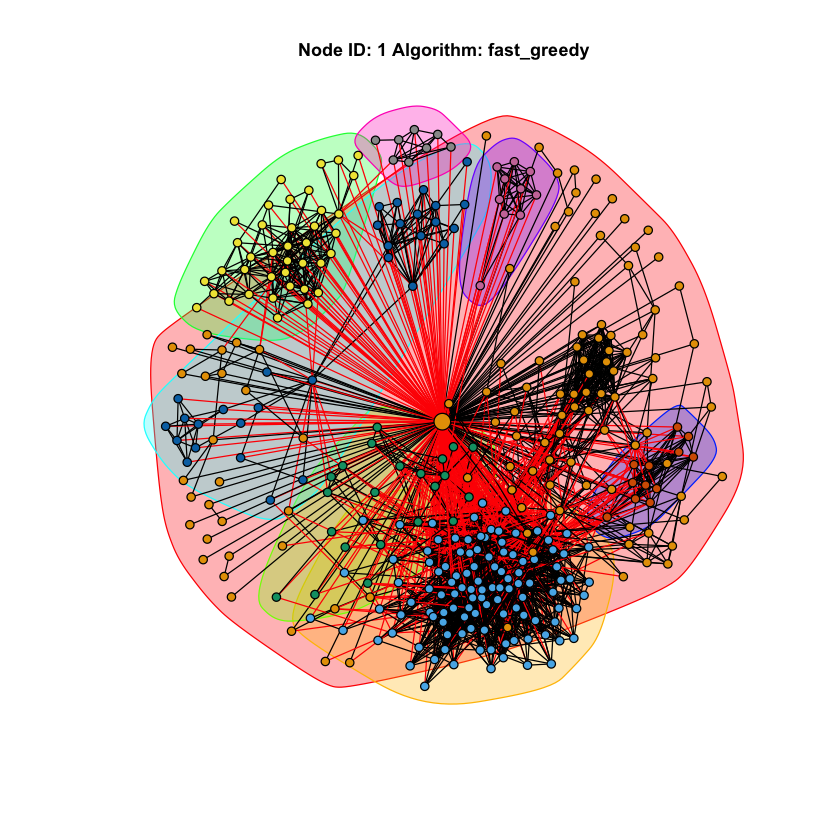

####################################################################################################
Node ID: 1 Algorithm: infomap
Diameter of personal network:  2
Infomap
Modularity of community:  0.389118471050977
Number of communities:  26


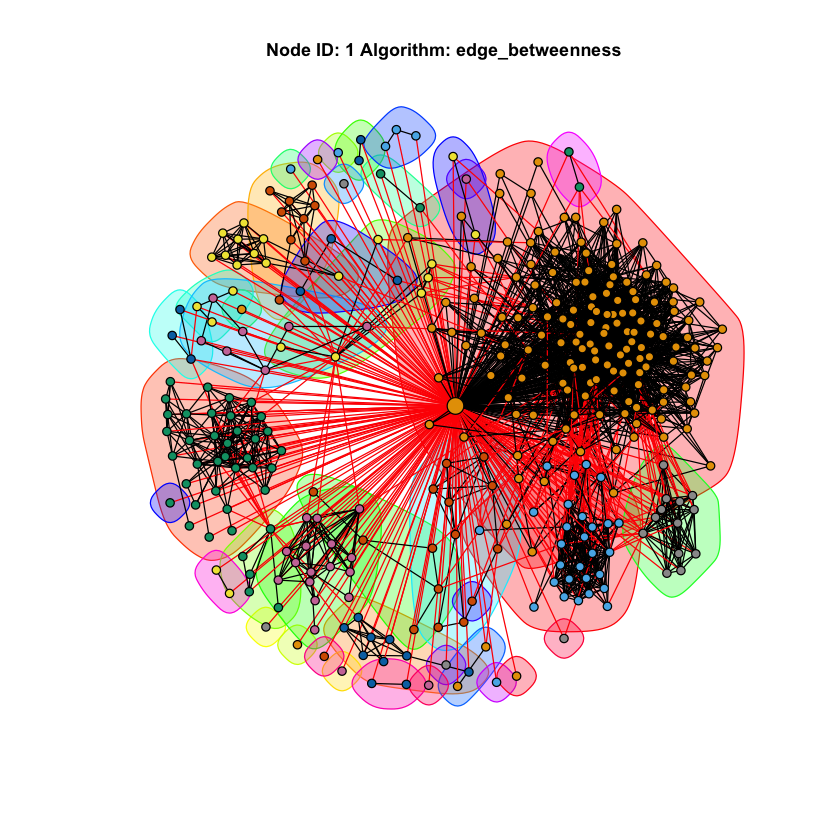

####################################################################################################
Node ID: 108 Algorithm: fast_greedy
Diameter of personal network:  2
Fast-greedy
Modularity of community:  0.435929376026475
Number of communities:  9


In [ ]:
node_ids = c(1, 108, 349, 484, 1087)
algorithms = c("fast_greedy", "edge_betweenness", "infomap")
for (node in node_ids) {
    for (algo in algorithms) {
        community_structure(node, algo)
    }
}

<h2>Q10</h2>

In [ ]:
for (node in node_ids) {
    for (algo in algorithms) {
        community_structure(node, algo, remove_core=TRUE)
    }
}